In [1]:
%load_ext autoreload
%autoreload 2

from perturbations import *
from representation import *
from ls import *
import jupyter_utils as utils
from ea import *
from cross import *

import numpy as np
import matplotlib.pyplot as plt
import tsplib95

In [2]:
# load problem from the library
problem = tsplib95.load("./archives/bayg29.tsp/bayg29.tsp")
#
# "./archives/brazil58.tsp/brazil58.tsp"
#  ./archives/bayg29.tsp/bayg29.tsp
n = problem.dimension
distance_matrix = utils.weights_to_matrix(problem.edge_weights)
print("size of matrix: ", n)
# best = 1610
fitness = fitness_wrapper(distance_matrix)

size of matrix:  29


In [3]:
init = better_init_wrapper(size=n, dist_matrix=distance_matrix)
# will be reused inside the function to init the population

# instance changes
crossover = crossover_scx
# crossover_pmx
# crossover_scx

perturb = perturb_invert

# population management
replacement = combined_replacement
selection = tournament_selection

# generations consts
prob_cross = 0.5
prob_mut = 0.1
gen_size = 1000
num_offsprings = 1500
tourn_size = 50
stoping_criterion = 20_000

# evaluation const
trials = 1
list_of_results = []

print(
    "approx number of offsprings created from each generation: ",
    num_offsprings * prob_cross,
)
last_history = []
for i in range(trials):
    results = ea_alg(
        fitness_fn=fitness,
        init_fn=init,
        selection_fn=selection,
        crossover_fn=crossover,
        mutation_fn=perturb,
        replacement_fn=replacement,
        generation_size=gen_size,
        distance_matrix=distance_matrix,
        p_cross=prob_cross,
        offspring_num=num_offsprings,
        p_mut=prob_mut,
        tournament_size=tourn_size,
        max_evaluations=stoping_criterion,
    )
    list_of_results.append(results["best_fitness"])
    last_history = results["history"]

list_of_results = np.array(list_of_results)


print(np.mean(list_of_results), np.std(list_of_results))
print(list_of_results)

approx number of offsprings created from each generation:  750.0
starting evolution:  best fitness of init 4413.0
1707.0 0.0
[1707.]


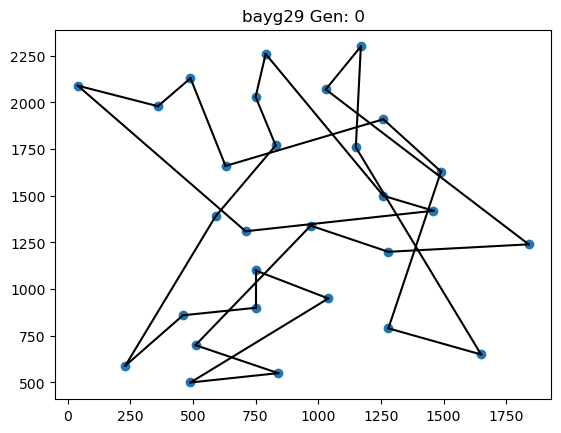

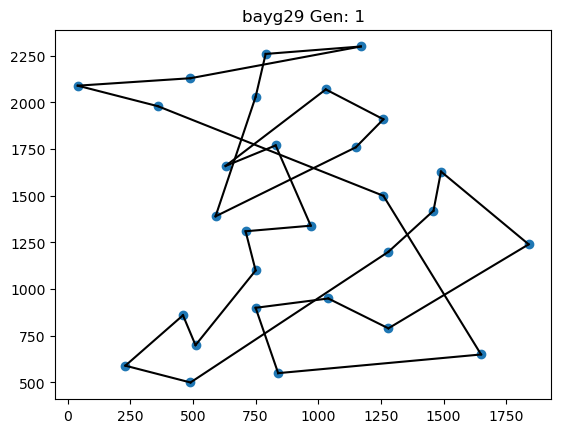

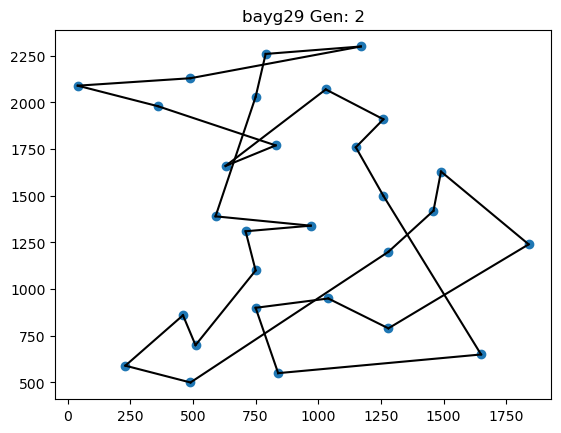

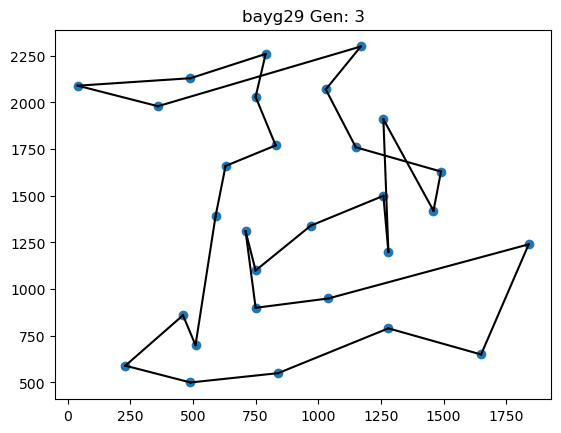

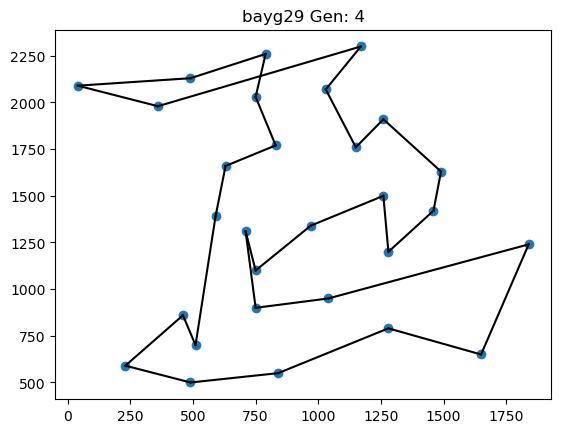

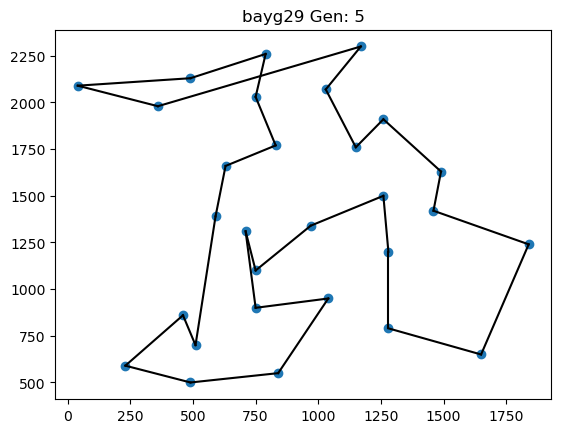

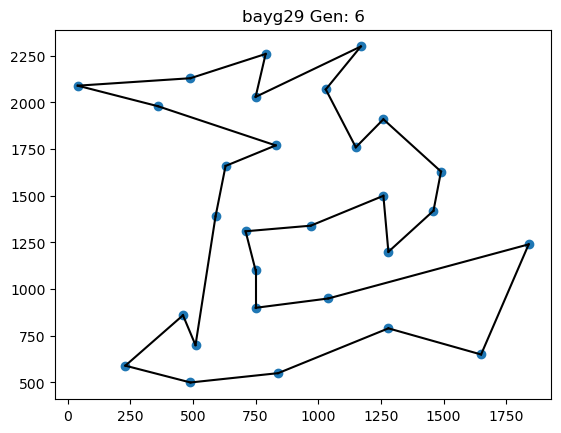

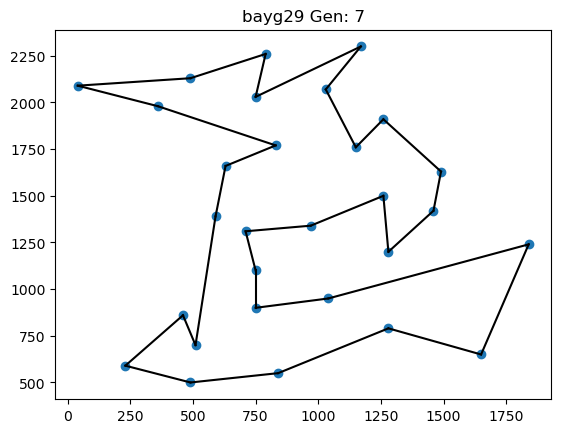

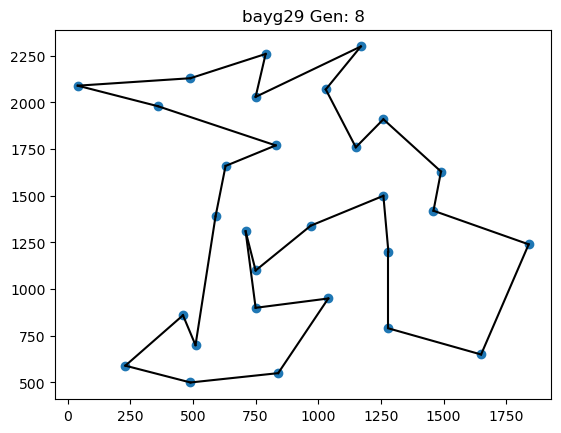

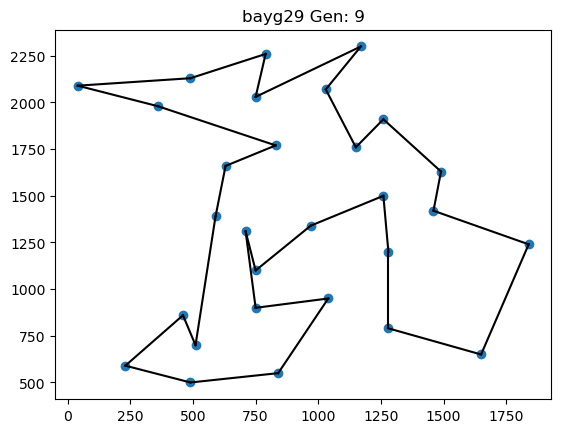

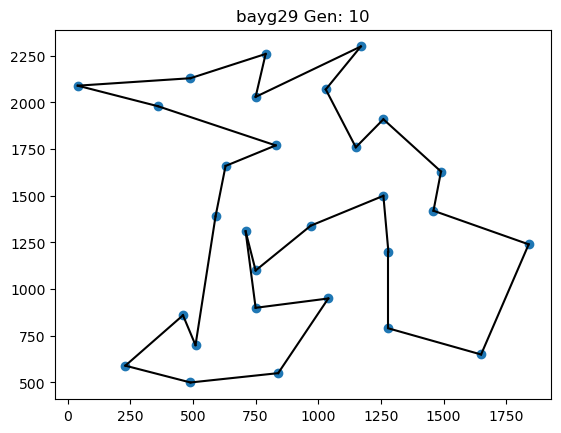

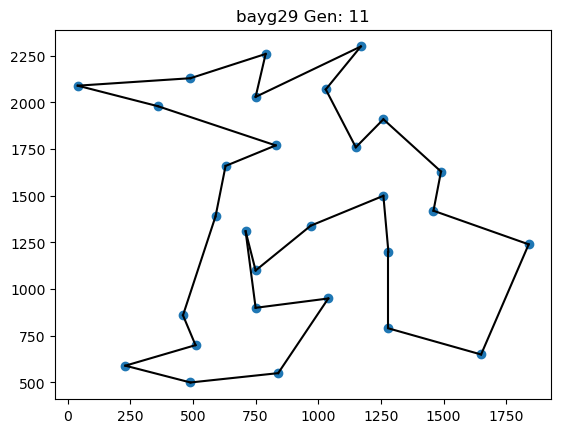

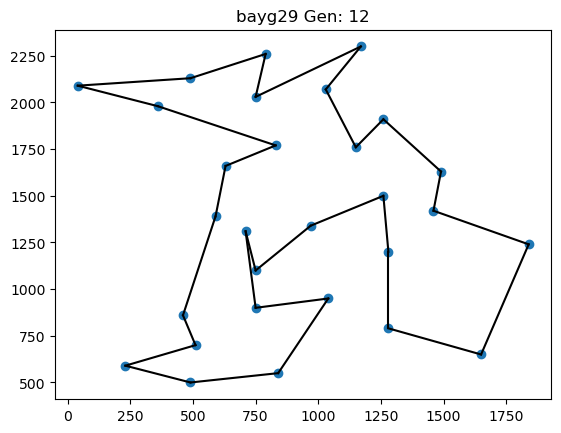

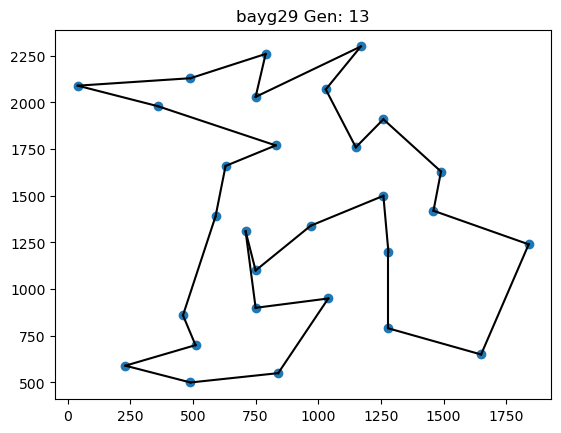

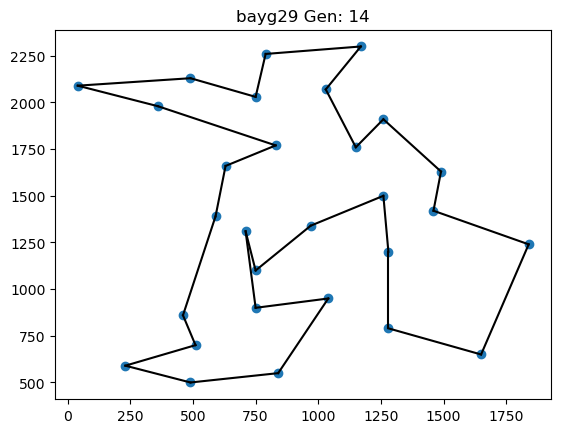

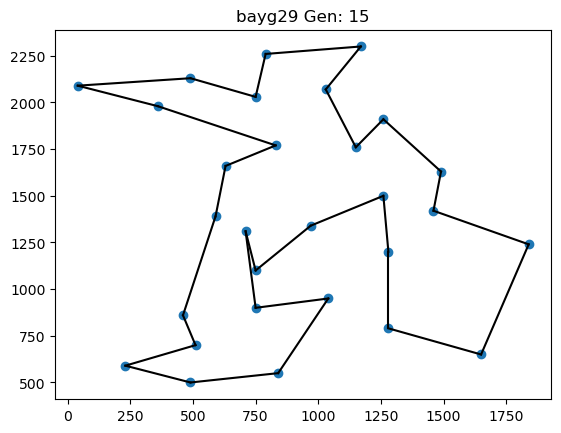

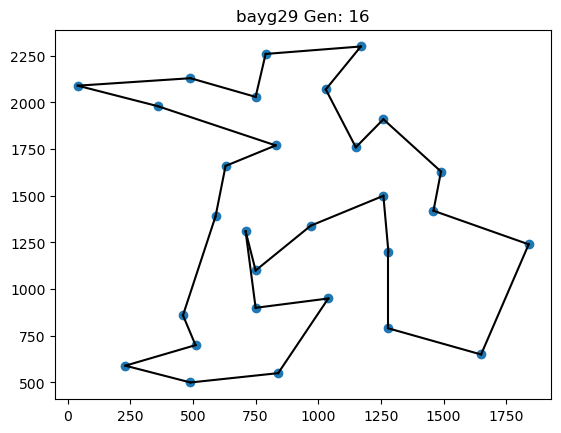

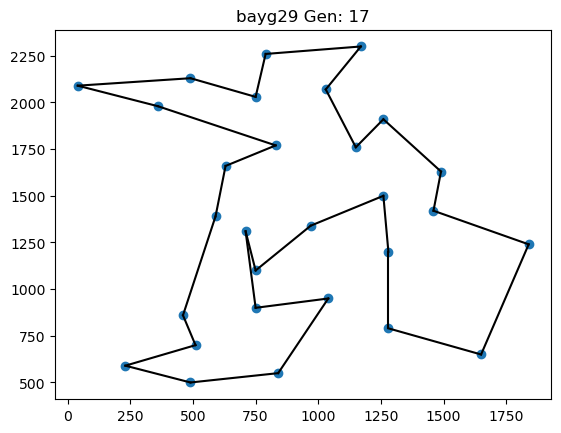

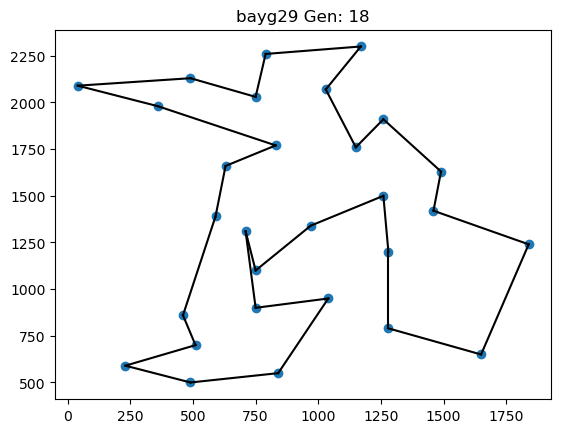

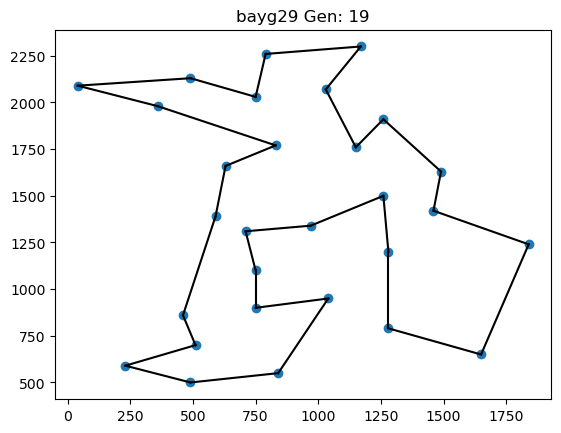

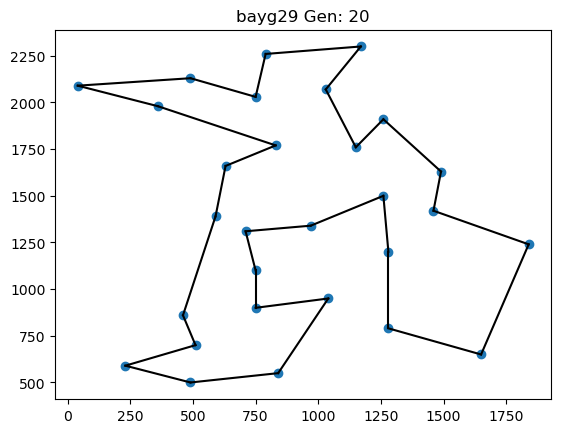

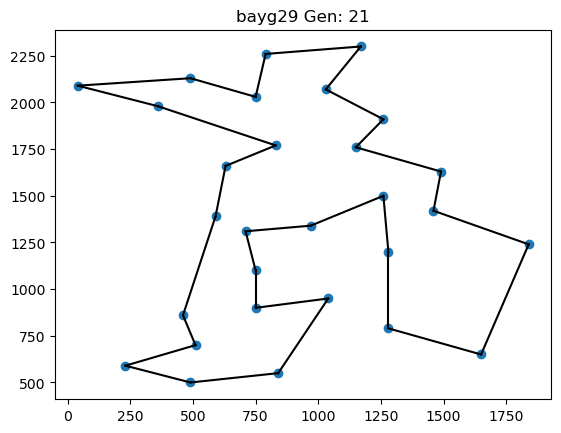

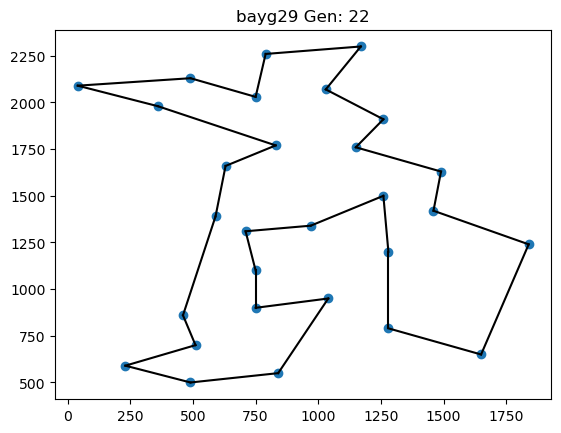

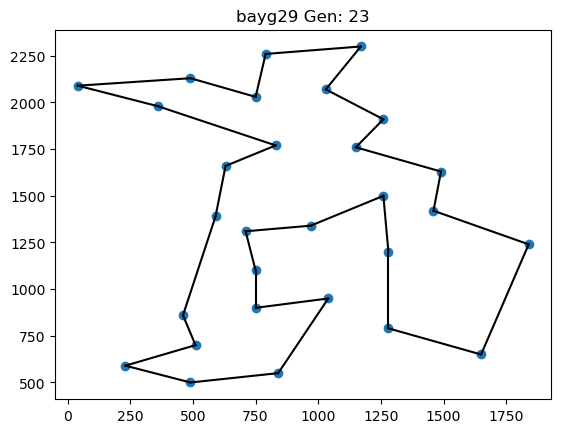

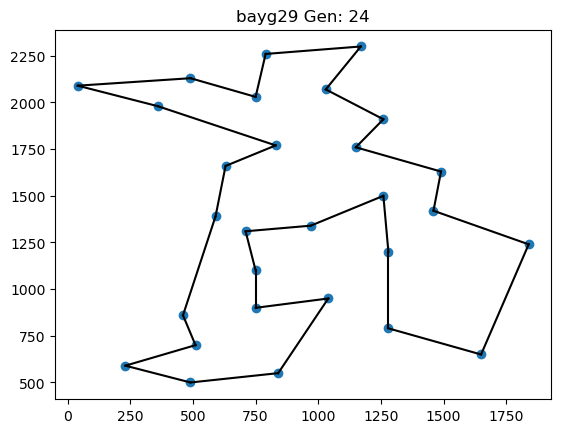

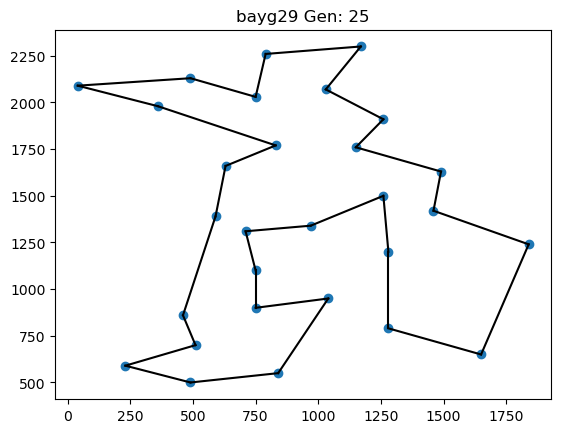

In [6]:
coords = problem.display_data
coords = np.array([coords[i + 1] for i in range(len(coords.keys()))])

for gen in last_history:
    best = gen["best_individual"]
    generace = gen["generation"]
    utils.draw_tour(coords, best, problem.name, generace)